# Sentiment Analysis of Flipkart Product Reviews Using Machine Learning

The aim of this project is to develop a machine learning model capable of efficiently and accurately predicting the sentiment of Flipkart product reviews. By automating sentiment analysis, this model aims to provide valuable insights for both businesses and consumers.

## Import Libraries
In the cell below all the libraries that are required to run the program smoothly are imported.

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

## Read Dataset
The dataset downloaded from kaggle website is downloaded and uploaded on  the colab notebook. Basic data analysis is performed in the following cells.

In [ ]:
dataset = pd.read_csv('/content/flipkart_product.csv', encoding = "unicode_escape")
dataset.shape

(189874, 5)

In [ ]:
dataset.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [ ]:
dataset.columns

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary'], dtype='object')

## Data Analysis

Data analysis is performed to understand the given dataset, so that necessary data pre-processing steps can be followed.

In [ ]:
s_data = dataset.drop(['Price',], axis = 1)
s_data.head(10)

,ProductName,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3,Fair,Ok ok product
5,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,5,Awesome,The cooler is really fantastic and provides go...
6,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,5,Highly recommended,Very good product
7,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3,Nice,Very nice
8,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,1,Unsatisfactory,Very bad cooler
9,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,4,Worth the money,Very good


In [ ]:
# Filter rows with non-numeric 'Rate' values
invalid_rate_rows = s_data[~s_data['Rate'].apply(lambda x: str(x).isdigit())]

# Display rows with invalid 'Rate' values
print("Rows with invalid 'Rate' values:")
display(invalid_rate_rows)


Rows with invalid 'Rate' values:


,ProductName,Rate,Review,Summary
40725,"Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Si...","Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Si...","Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Si...","Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Si..."
82709,Bajaj DX 2 L/W Dry Iron,Bajaj DX 2 L/W Dry Iron,Bajaj DX 2 L/W Dry Iron,Bajaj DX 2 L/W Dry Iron
82720,Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey...,Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey...,Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey...,Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey...
152659,Qubo Smart Cam 360 Q100 by HERO GROUP 1080p FH...,s,Mind-blowing purchase,Very good feature rich camera. It instantly de...
189873,,NaN,NaN,NaN


## Dataset Pre-processing

Data pre-processing techniques that are useful to clean the dataset are used in the following cells. Following these techniques helps in reducing the computation as well make the dataset more efficient for the training an AI model.

In [ ]:
# Drop rows with invalid 'Rate' values
s_data = s_data[s_data['Rate'].apply(lambda x: str(x).isdigit())].reset_index(drop=True)


In [ ]:
# Drop rows having missing values
s_data = s_data.dropna().reset_index(drop=True)

# Define function to clean dataset
def cleanData(text):
  # Convert tect to lowercase
  text = text.lower()
  # Remove special characters and symbols
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  # Remove extra whitespaces
  text = re.sub(r'\s+', ' ', text).strip()
  return text

# Apply the data cleaning function on the review and summary columns
s_data['Summary'] = s_data['Summary'].apply(cleanData)
s_data['Review'] = s_data['Review'].apply(cleanData)

# Combine Review and Summary columns
s_data['Text'] = s_data['Review'] + " " + s_data['Summary']

# Tokenization and Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_features = tfidf_vectorizer.fit_transform(s_data['Text'])

# Encode the target variable
label_encoder = LabelEncoder()
s_data['Encoded_Rate'] = label_encoder.fit_transform(s_data['Rate'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, s_data['Encoded_Rate'], test_size=0.3, random_state=42)

# Print the shape of the processed data
print("Shape of TF-IDF Features:", X_train.shape)
print("Shape of Target Variable:", y_train.shape)

Shape of TF-IDF Features: (132897, 43686)
Shape of Target Variable: (132897,)


In [ ]:
# Identify rows with non-numeric values in the 'Rate' column
non_numeric_rows = s_data[~s_data['Rate'].apply(lambda x: str(x).isdigit())]

# Display the rows containing non-numeric values in the 'Rate' column
print("Rows containing non-numeric values in the 'Rate' column:")
print(non_numeric_rows)


Rows containing non-numeric values in the 'Rate' column:
Empty DataFrame
Columns: [ProductName, Rate, Review, Summary, Text, Encoded_Rate]
Index: []


In [ ]:


# Convert 'Rate' column to numeric, handle errors by setting invalid values to NaN
s_data['Rate'] = pd.to_numeric(s_data['Rate'], errors='coerce')

# Drop rows with NaN values in the 'Rate' column
s_data = s_data.dropna(subset=['Rate']).reset_index(drop=True)


## Data Visualization Post Data Pre-processing

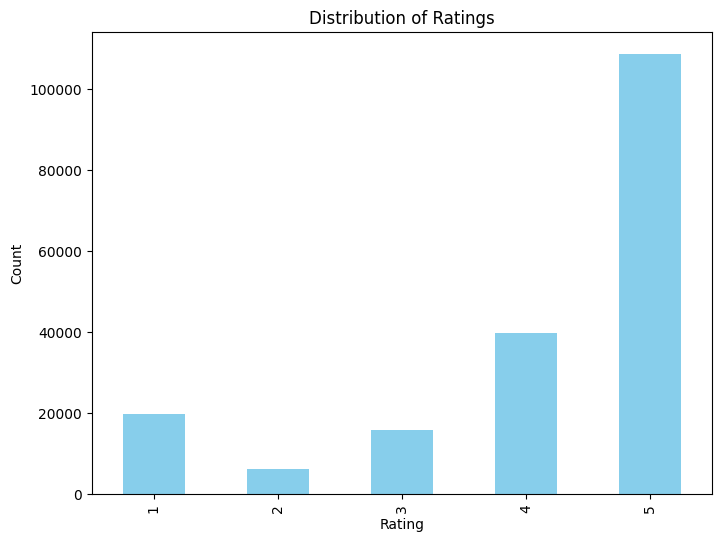

In [ ]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
s_data['Rate'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

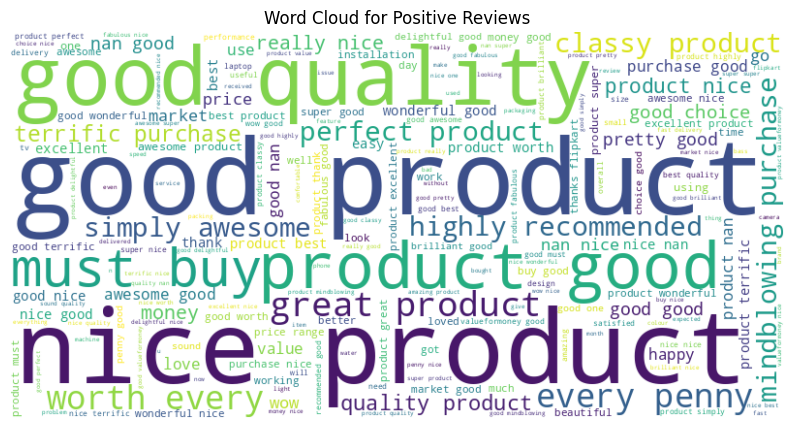

In [ ]:
# Convert 'Rate' column to numeric
s_data['Rate'] = pd.to_numeric(s_data['Rate'])

# Word Cloud for Positive Reviews
positive_reviews = s_data[s_data['Rate'] > 3]['Text'].values
positive_text = ' '.join(positive_reviews)
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


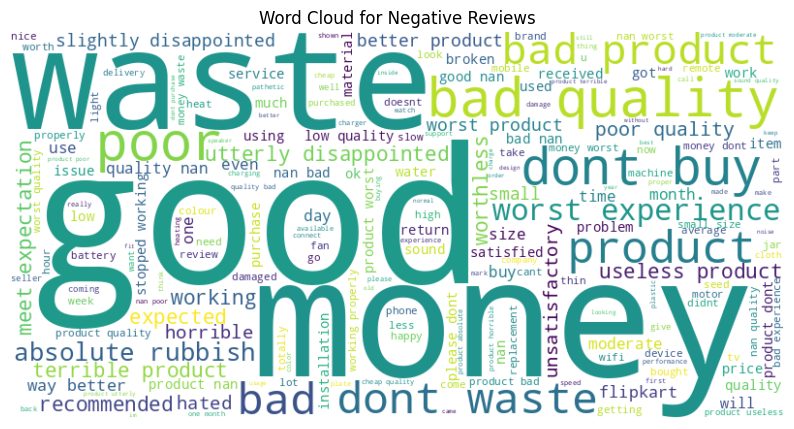

In [ ]:
# Word Cloud for Negative Reviews
negative_reviews = s_data[s_data['Rate'] < 3]['Text'].values
negative_text = ' '.join(negative_reviews)
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

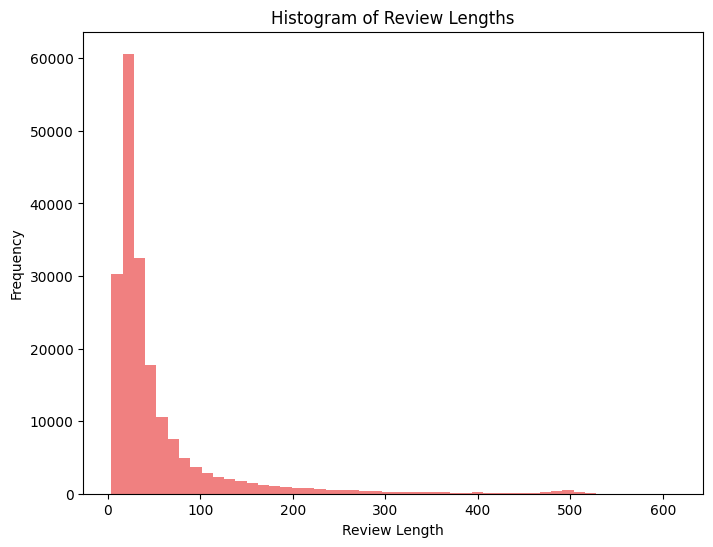

In [ ]:
# Histogram of Review Lengths
review_lengths = s_data['Text'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(review_lengths, bins=50, color='lightcoral')
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


## Data Balancing

After analyising the cleaned data, it is observed that the available data is imbalanced which my cause overfitting of the models as the samples with rating five is nearly 50 percent of the total data. Thus, to avoid the issues related to databalancing different data balancing techniques are experimented. Upsampling the minor dataset can sole the challenge but it increases the computation required thus final decision is made to use downsampling and the samples of all the different ratings are reduced to the number of samples of rating 2  whch results in a balanced data which require moderate computation.

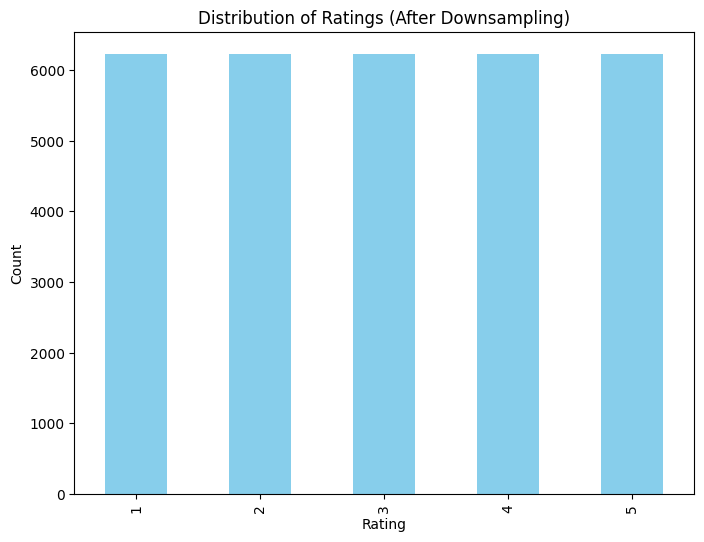

In [ ]:
from sklearn.utils import resample

# Get the size of the minority class (rating 2)
minority_class_size = s_data['Rate'].value_counts().min()

# Create separate DataFrames for each class
class_dfs = {}
for rate in range(1, 6):
    class_dfs[rate] = s_data[s_data['Rate'] == rate]

# Downsample all classes to match the size of the minority class (rating 2)
downsampled_dfs = {}
for rate, df in class_dfs.items():
    downsampled_dfs[rate] = resample(df, replace=False, n_samples=minority_class_size, random_state=42)

# Combine downsampled class samples
balanced_data = pd.concat(list(downsampled_dfs.values()))

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Visualize the distribution of ratings after downsampling
plt.figure(figsize=(8, 6))
balanced_data['Rate'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings (After Downsampling)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


## Implementation of Machine Learning Models

Five different machine learning models are implemented and compared to recommend a better performing model. The performance of models is compared on using three different sizes of the dataset.

Performance of Models:
                     Accuracy  Precision  Recall  F1-score
Logistic Regression     0.849   0.850263   0.849  0.842676
Random Forest           0.857   0.857593   0.857  0.849831
Gradient Boosting       0.854   0.854271   0.854  0.847964
SVM                     0.843   0.846870   0.843  0.834452
K-Nearest Neighbors     0.821   0.818561   0.821  0.818540


<ipython-input-17-621b272a65a7>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y='Accuracy', palette='viridis')


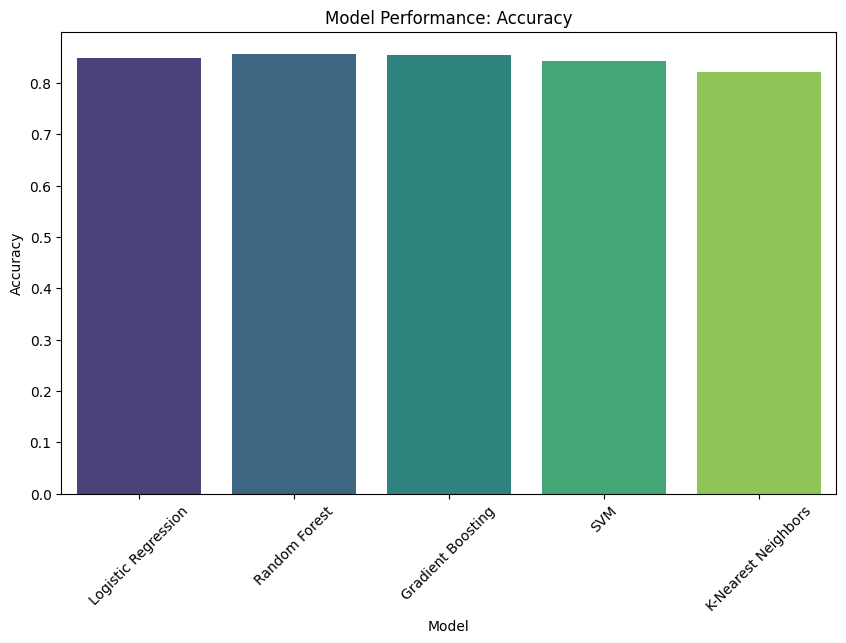

In [ ]:
# Sample a subset of the preprocessed data
sampled_data = s_data.sample(n=5000, random_state=42)  # Adjust the number of samples as needed

# Split data into train and test sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(sampled_data['Text'], sampled_data['Encoded_Rate'], test_size=0.2, random_state=42)

# Tokenization and Vectorization using TF-IDF on sampled data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print("Performance of Models:")
print(results_df)

# Visualize performance
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x=results_df.index, y='Accuracy', palette='viridis')
plt.xticks(rotation=45)
plt.title('Model Performance: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


Performance of Models:
                     Accuracy  Precision   Recall  F1-score
Logistic Regression   0.87675   0.876332  0.87675  0.872674
Random Forest         0.89025   0.889523  0.89025  0.886317
Gradient Boosting     0.87600   0.878208  0.87600  0.871467
SVM                   0.88325   0.884266  0.88325  0.878290
K-Nearest Neighbors   0.81125   0.807494  0.81125  0.807798


<ipython-input-19-98af60e956b9>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y='Accuracy', palette='viridis')


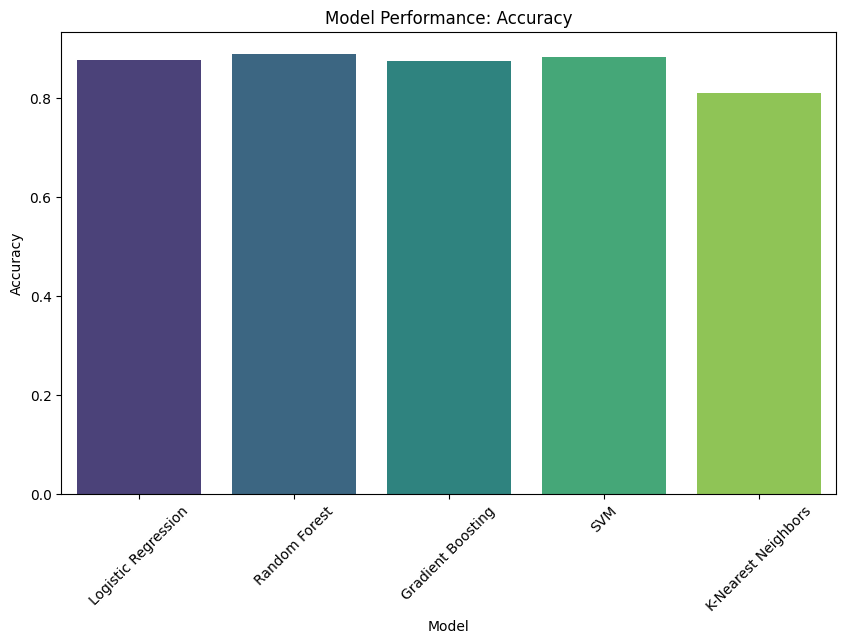

In [ ]:
# Sample a subset of the preprocessed data
sampled_data = s_data.sample(n=20000, random_state=42)  # Adjust the number of samples as needed

# Split data into train and test sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(sampled_data['Text'], sampled_data['Encoded_Rate'], test_size=0.2, random_state=42)

# Tokenization and Vectorization using TF-IDF on sampled data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print("Performance of Models:")
print(results_df)

# Visualize performance
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x=results_df.index, y='Accuracy', palette='viridis')
plt.xticks(rotation=45)
plt.title('Model Performance: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


Performance of Models:
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.892339   0.890368  0.892339  0.889097
Random Forest        0.904769   0.904511  0.904769  0.901322
Gradient Boosting    0.880224   0.883749  0.880224  0.875546
SVM                  0.905955   0.905557  0.905955  0.902674
K-Nearest Neighbors  0.805641   0.806568  0.805641  0.805548


<ipython-input-20-156b7abacc31>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y='Accuracy', palette='viridis')


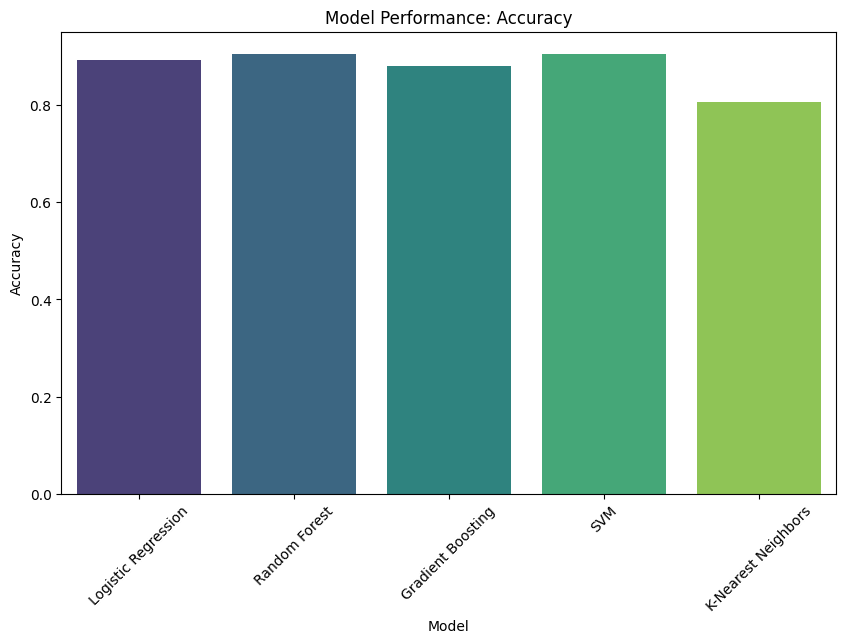

In [ ]:
# Sample a subset of the preprocessed data
sampled_data = s_data

# Split data into train and test sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(sampled_data['Text'], sampled_data['Encoded_Rate'], test_size=0.2, random_state=42)

# Tokenization and Vectorization using TF-IDF on sampled data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print("Performance of Models:")
print(results_df)

# Visualize performance
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x=results_df.index, y='Accuracy', palette='viridis')
plt.xticks(rotation=45)
plt.title('Model Performance: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
